In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 40

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/AIprojects/potato_diesese/training/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

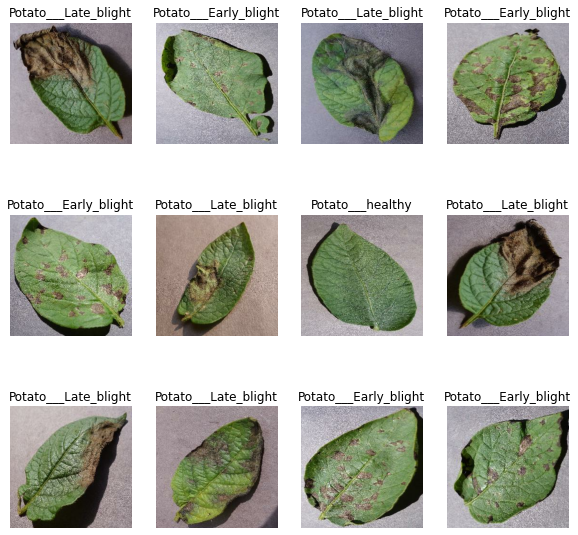

In [8]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [9]:
train_size = .8
len(dataset)*train_size


54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)


54

In [11]:

test = dataset.skip(54)
len(test)

14

In [12]:
val_size = .1
len(dataset)*val_size


6.800000000000001

In [13]:
val_ds = test.take(6)
len(val_ds)

6

In [14]:
test_ds = test.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_spilt = .8, val_split = .1, test_split=.1, shuffle = True, shuffle_size = 10000):
  
  ds_size=len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)

  train_size = int(train_spilt * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [16]:
 train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
          layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
          layers.experimental.preprocessing.RandomRotation(0.2),        
])

In [23]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
                          resize_and_rescale,
                          data_augmentation,
                          layers.Conv2D(32,(3,3),activation = 'relu', input_shape = input_shape),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(64, activation = 'relu'),
                          layers.Dense(n_classes, activation = 'softmax')
                           


])
model.build(input_shape = input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/40
54/54 [==============================] - 304s 148ms/step - loss: 0.9223 - accuracy: 0.4664 - val_loss: 0.8513 - val_accuracy: 0.5469
Epoch 2/40
54/54 [==============================] - 4s 69ms/step - loss: 0.7688 - accuracy: 0.5972 - val_loss: 0.5875 - val_accuracy: 0.7344
Epoch 3/40
54/54 [==============================] - 4s 70ms/step - loss: 0.4945 - accuracy: 0.7633 - val_loss: 0.4732 - val_accuracy: 0.7604
Epoch 4/40
54/54 [==============================] - 4s 69ms/step - loss: 0.3642 - accuracy: 0.8438 - val_loss: 0.2820 - val_accuracy: 0.8698
Epoch 5/40
54/54 [==============================] - 4s 70ms/step - loss: 0.3491 - accuracy: 0.8519 - val_loss: 0.2963 - val_accuracy: 0.8594
Epoch 6/40
54/54 [==============================] - 4s 69ms/step - loss: 0.3017 - accuracy: 0.8785 - val_loss: 0.2259 - val_accuracy: 0.8958
Epoch 7/40
54/54 [==============================] - 4s 70ms/step - loss: 0.2517 - accuracy: 0.9022 - val_loss: 0.2515 - val_accuracy: 0.8802
Epoch 8/40

In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 0s 32ms/step - loss: 0.0156 - accuracy: 0.9961


In [30]:
scores

[0.015557319857180119, 0.99609375]

In [31]:
history

In [32]:
history.params



{'epochs': 40, 'steps': 54, 'verbose': 1}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

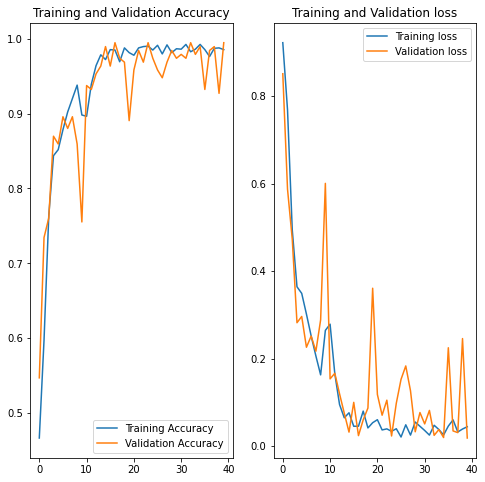

In [40]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy,label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')

first image to predict
first image's actual label: Potato___Late_blight
[2.6916882e-07 9.9999976e-01 6.9969407e-14]
predicted_label: Potato___Late_blight


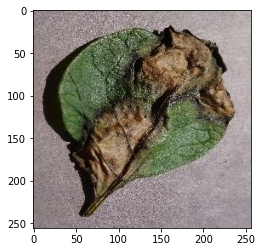

In [45]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print("first image's actual label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print(batch_prediction[0])
  print('predicted_label:', class_names[np.argmax(batch_prediction[0])])

In [54]:
def Predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) #create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

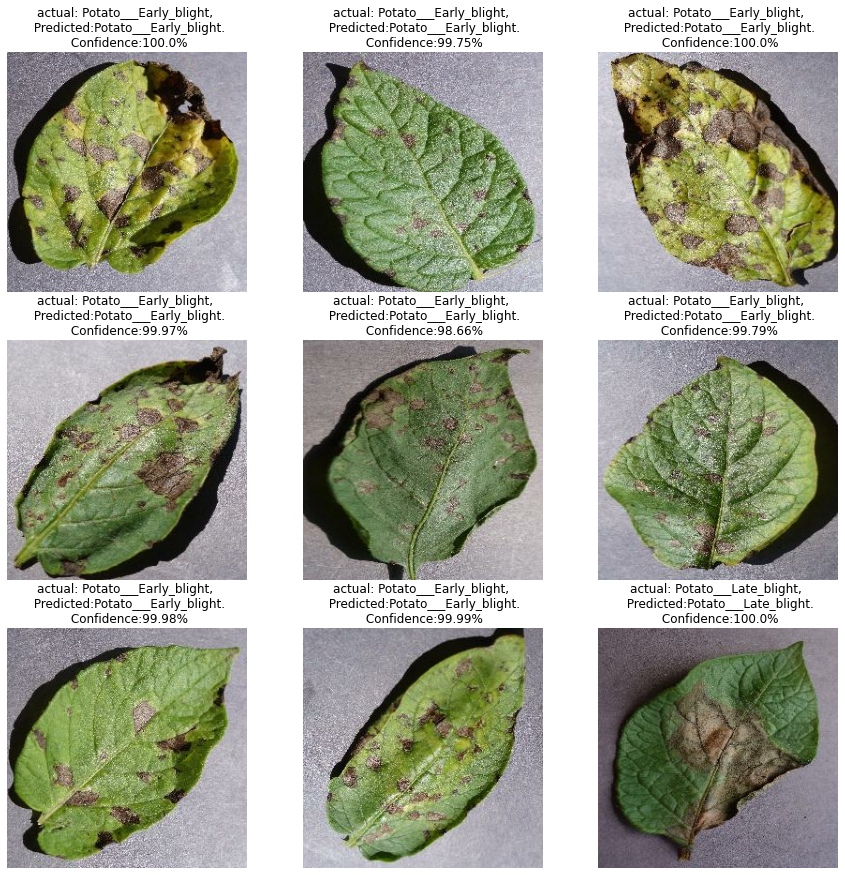

In [56]:
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class, confidence = Predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"actual: {actual_class}, \n Predicted:{predicted_class}.\n Confidence:{confidence}%")
    plt.axis('off')

In [58]:
model_version = 1
model.save(f"/content/drive/MyDrive/AIprojects/potato_diesese/models/{model_version}")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIprojects/potato_diesese/models/1/assets


In [60]:
import os
os.listdir("/content/drive/MyDrive/AIprojects/potato_diesese/models")

['1']

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
